In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
#import warnings
#warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_columns', 100)
from subprocess import check_output

Matplotlib is building the font cache; this may take a moment.


In [2]:
business = pd.read_csv('../YELP/business.csv')

In [3]:
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,KfMtlPifyJfbSAYdpQfvX1,Starbucks,1154 Boylston St,Chestnut Hill,MA,2467.0,42.323800,-71.162340,3.0,10,0,"{restaurantspricerange2=2, businessacceptscred...","[Coffee & Tea, Convenience Stores, Food]",NaN
1,KfMtlPifyJfbSAYdpQfvX2,The District at Mills 50,1221 N Mills Ave,Orlando,FL,32803.0,28.561884,-81.364220,4.5,71,0,"{restaurantspricerange2=2, restaurantstakeout=...","[Shopping, Home Decor, Cosmetics & Beauty Supp...","{sunday=10:0-19:0, saturday=9:0-21:0, tuesday=..."
2,KfMtlPifyJfbSAYdpQfvX3,Seastar Bakery,1603 NE Killingsworth St,Portland,OR,97211.0,45.562847,-122.648930,4.5,88,1,"{businessacceptscreditcards=True, bikeparking=...","[Breakfast & Brunch, Coffee & Tea, Bakeries, R...","{sunday=8:0-20:0, saturday=8:0-20:0, tuesday=1..."
3,KfMtlPifyJfbSAYdpQfvX4,Panera Bread,841 Worcester St,Natick,MA,1760.0,42.301025,-71.358970,2.5,57,1,"{alcohol=u'none', businessacceptscreditcards=T...","[Salad, Food, Breakfast & Brunch, Soup, Bagels...","{sunday=6:30-20:30, saturday=6:0-22:0, tuesday..."
4,KfMtlPifyJfbSAYdpQfvX5,7-Eleven,2620 Lake Austin Blvd,Austin,TX,78703.0,30.282053,-97.775604,2.0,7,1,"{restaurantspricerange2=1, restaurantstakeout=...","[Gas Stations, Automotive, Gas Stations, Food,...","{sunday=0:0-0:0, saturday=0:0-0:0, tuesday=0:0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,bVQHJXfiG7496Um9WSLJOw,Starbucks,1 Financial Ctr,Boston,MA,2111.0,42.352240,-71.055970,3.0,42,1,"{restaurantspricerange2=2, restaurantstakeout=...","[Coffee & Tea, Food, Restaurants]","{tuesday=6:0-15:0, thursday=6:0-15:0, wednesda..."
6286,yK94eQsHtI6ztqzCs9tOaQ,McDonald's,10050 SW Barbur Blvd,Portland,OR,97219.0,45.452650,-122.722530,2.0,51,1,"{alcohol=u'none', businessacceptscreditcards=T...","[Burgers, American (Traditional), Fast Food, C...","{sunday=4:0-0:0, saturday=0:0-0:0, tuesday=4:0..."
6287,rOn6KvbHH4wvwVFSUgizWg,Zigo,"3 Blackfan Cir, Center for Life Science Boston...",Boston,MA,2115.0,42.339016,-71.104120,2.5,5,0,"{restaurantspricerange2=1, restaurantstakeout=...","[Coffee & Tea, Restaurants, Sandwiches, Food]","{tuesday=8:0-19:0, thursday=8:0-19:0, wednesda..."
6288,lNKiSRXNRfIEKUZCD7OJAQ,Starbucks,"5800 Meadows Rd, Ste 190",Lake Oswego,OR,97035.0,45.417420,-122.738100,4.0,12,1,"{restaurantspricerange2=2, restaurantstakeout=...","[Restaurants, Food, Coffee & Tea]","{tuesday=5:30-17:30, thursday=5:30-17:30, wedn..."


In [27]:
review = pd.read_csv('../YELP/review.csv')

In [28]:
review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,y9LjbrTVwjjGeF8B3OgBTA,7G5zDV-olQZTTWzWuSqotg,JuTlOfaUDnqnNEG8QYnYrw,2.0,0,0,0,"This restaurant was your typical ""hipster"" est...",2019-08-15 11:16:24
1,9c8fm0S8-sVf5bqJMWBYtg,d2-Ihy_voYANxuCMUenMgQ,d3OyBZ7BorkexfTdgcrTuA,5.0,0,0,0,Had them through Uber Eats and it was amazing!...,2020-12-07 23:52:30
2,GNhk56HTgPVkDRVJFRzfxQ,0PrV9wgHBnDwb71F-ZhMag,2sUwqyAICjFUnC4Iu_W3qQ,5.0,0,0,1,Just moved in around the corner and this place...,2019-01-08 20:38:33
3,T2WeI1ih7lMEe9jLT7e0Og,UFHsd6UReXizCd6Klb17Jg,6c7-aX7VUO1-royM4wfzOQ,5.0,0,0,0,"Simon, was awesome. Food was great and we real...",2019-03-24 18:48:46
4,tP-La1yqjvT_yrKhcMHksQ,XqpD3goWk-hoaUlOhcCsfA,6c7-aX7VUO1-royM4wfzOQ,1.0,0,0,0,Today was my first purchase with this overpric...,2020-02-26 04:10:16
...,...,...,...,...,...,...,...,...,...
605298,lYNZD63ZhiavGJ7LfE_pKQ,pJPd--bNj-AKfGRRDER9Zw,BN8PZR-I2T7_nvnVp5M7Sg,1.0,0,0,0,Attitude at drive in tonight stunk. Avoid this...,2020-02-24 23:48:31
605299,bzAn98wfuoNmp52P2M2UNw,GuuV2dfGxO0ighs66RTmRg,HfVoKCImxjNagh9l6g1q-g,4.0,2,0,1,I really want this place to survive! Every tim...,2019-09-14 13:23:13
605300,GZ2854pcEJdKyWWtkuSQeg,p9EVn2HV6nF8BMDphSu91g,XUF26OSP_sSm5JWI5OXoxg,5.0,2,0,0,Great little coffee shop with pastries and ver...,2017-09-23 16:17:37
605301,XUfh4KVNtkm6cyhwMme0sw,-2CvMfsHqzaxG7SSpIbJTw,MnQUNBQ9Deprab2Ro2cJUg,5.0,0,0,0,Stumbled onto this place while visiting the me...,2019-02-15 17:38:56


In [13]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [14]:
#Null Values...
business.isnull().sum().sort_values(ascending=False)

hours           568
attributes       40
address          31
postal_code       1
business_id       0
name              0
city              0
state             0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories        0
dtype: int64

In [15]:
#are all business Id's unique?
business.business_id.is_unique #business_id is all unique

True

In [16]:
business.city.value_counts()

Portland        1050
Austin           688
Boston           532
Atlanta          488
Orlando          449
                ... 
Clintonville       1
Brookhaven         1
Lincoln            1
Dover              1
East Walpole       1
Name: city, Length: 242, dtype: int64

In [38]:
highest_review_restaurant=business[['name', 'review_count', 'city','state', 'stars']].sort_values(ascending=False, by="review_count")[0:50]

In [39]:
highest_review_restaurant

,name,review_count,city,state,stars
3645,Mike's Pastry,7298,Boston,MA,4.0
4901,Powell's City of Books,4295,Portland,OR,5.0
1606,Blue Star Donuts,4011,Portland,OR,4.0
3377,Atlanta Breakfast Club,3761,Atlanta,GA,4.5
3324,Salt & Straw,3672,Portland,OR,4.5
3655,Pip's Original Doughnuts & Chai,2482,Portland,OR,4.5
1817,Bouldin Creek Cafe,2328,Austin,TX,4.5
3871,Modern Pastry Shop,2042,Boston,MA,4.0
5225,Se7en Bites,1919,Orlando,FL,4.5
676,Mike & Patty's,1756,Boston,MA,4.5


In [43]:
highest_review_restaurant.to_csv('Top-20-restaurants-with-hightestreviews.csv', encoding='utf-8',index=False)

In [31]:
city_business_counts = business[['city', 'business_id']].groupby(['city'])\
['business_id'].agg('count').sort_values(ascending=False)

In [32]:
city_business_counts

city
Portland           1050
Austin              688
Boston              532
Atlanta             488
Orlando             449
                   ... 
Scottdale             1
Gainesville           1
South Brookline       1
South Weymouth        1
ATLANTA               1
Name: business_id, Length: 242, dtype: int64

In [33]:
city_business_counts = pd.DataFrame(data=city_business_counts)

In [34]:
city_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)

Text(0.5, 1.0, 'Top 50 cities by businesses listed')

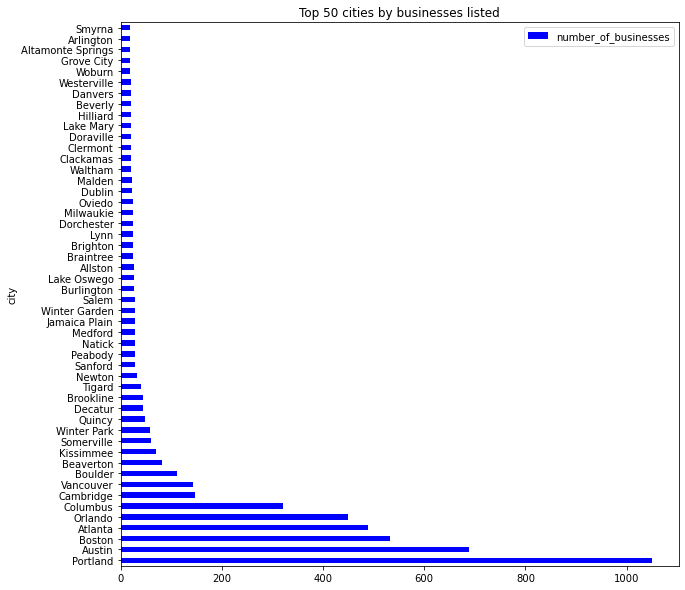

In [35]:
city_business_counts[0:50].sort_values(ascending=False, by="number_of_businesses")\
.plot(kind='barh', stacked=False, figsize=[10,10], colormap='winter')
plt.title('Top 50 cities by businesses listed')

In [36]:
city_business_counts.to_csv('Top-20-cities-with-coffee-shops.csv', encoding='utf-8')

In [37]:
city_business_reviews = business[['city', 'review_count', 'stars']].groupby(['city']).\
agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10)

,review_count,stars
city,,
Portland,104886,3.954286
Austin,90246,3.751453
Boston,61353,3.504699
Atlanta,45834,3.550205
Orlando,35026,3.437639
Cambridge,24514,3.523810
Columbus,16599,3.443750
Boulder,10439,3.816964
Somerville,8148,3.675000


Text(0.5, 1.0, 'Top 50 cities by reviews')

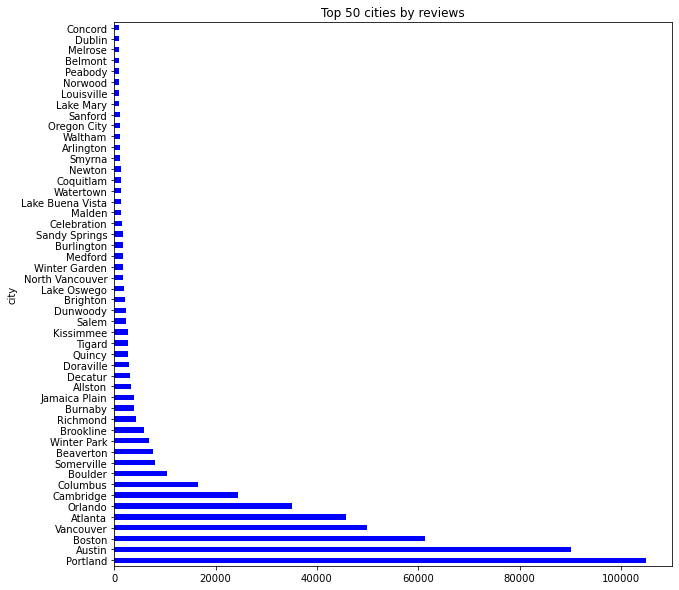

In [22]:
city_business_reviews['review_count'][0:50].plot(kind='barh', stacked=False, figsize=[10,10], \
                                                 colormap='winter')
plt.title('Top 50 cities by reviews')

In [25]:
tip = pd.read_csv('../YELP/tip.csv')

In [27]:
tip.head(15)

,user_id,business_id,text,date,compliment_count
0,KZ-DW30tuRBs-97Huuprwg,ymdS2fkjtFsPGT_qO_mZ7w,"Great coffee, sitting outside.",2012-04-11 01:17:21,0
1,WxogLmy3rS6qUSpAHRaEkg,k6mmr7upHW85nsyRZiLu2Q,Dessert here is weird. Not creme brûlée but Ir...,2013-11-14 01:56:29,0
2,2jq3Uklz5TDlrjahgXOo8w,mGProWKI7ZkOm3a7pG7jpg,Best coffee in van,2014-11-29 20:04:13,0
3,jIZq73u8z2RqjE8WmkA6yg,mQ--5JoQtMEcVwuRa3txMA,"Try the Vietnamese egg rolls, shaken beef, and...",2016-06-21 00:44:31,0
4,FE9P34CvAsSgwvhDn_ILQg,AJVUTa5GkoDFulhmyvhoZQ,Mac and cheese is on point and the Nutella cof...,2016-03-12 19:03:16,0
5,6nhA7SOLdSqe0DQ51vHHGg,pewcbd-NCgj1LXJNifFA4g,Great coffee and breakfast tacos,2013-04-16 16:15:40,0
6,gbLGpTpoTuzbMEGN-5Obvw,7IuCccysE5EkOzvLajwHqg,Great coffee. Great pastries. Nuff said.,2015-09-27 14:26:59,0
7,7VP1IDHmwvVeggHu-8f5iw,V45zDgf_HFebGD5pbE5dfg,coffee!!!!!!!!!!,2012-11-07 13:36:54,0
8,acMbNMtlfSlbmLJBanfYJA,NKPDVoMYufyWJVx9c6hqSQ,Great coffee!,2014-03-31 21:41:21,0
9,dquZjlLzF2CezsxWDC6T8A,eaot-BCBn2SVgdxyATckVg,"Snowing today, so coffee drink it is",2012-01-16 01:46:39,0


In [28]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate','classy','classiest']
selected_words

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate',
 'classy',
 'classiest']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)
#corpus = ['This is the first document.','This is the second second document.']
#print corpus
selected_word_count = vectorizer.fit_transform(tip['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate',
 'classy',
 'classiest']

In [34]:
word_count_array = selected_word_count.toarray()
word_count_array.shape

(18953, 13)

In [35]:
word_count_array.sum(axis=0)

array([ 341, 2104,  133,  512,  567,   32,  184,   55,   30,   18,   18,
          9,    0], dtype=int64)

In [36]:
temp = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

<AxesSubplot:>

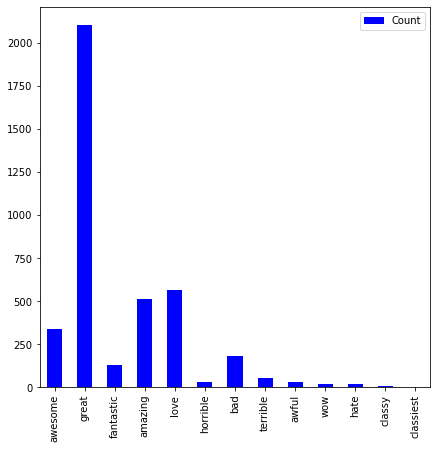

In [37]:
temp.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')

In [25]:
import csv 
import json 

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePath = r'Top-20-cities-with-coffee-shops.csv'
jsonFilePath = r'data.json'
csv_to_json(csvFilePath, jsonFilePath)

In [44]:
import csv 
import json 

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePath = r'Top-20-restaurants-with-hightestreviews.csv'
jsonFilePath = r'datareview.json'
csv_to_json(csvFilePath, jsonFilePath)